In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd  /content/drive/MyDrive/CS506/Spark
%ls

/content/drive/MyDrive/CS506/Spark
DailyWeights.csv  date_temperature.csv  devs.csv
Data/             devices.csv           weather.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from scipy import stats

In [ ]:
dw = pd.read_csv('DailyWeights.csv')
dw = dw[dw['Customer Key']>0]
dw['Customer Key'] = dw['Customer Key'].astype('int32')
dw.head()

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582,200 Riverway,200 Riverway,6/27/2022,Trash,1.88
1,31582,200 Riverway,200 Riverway,6/9/2022,Trash,2.13
2,31582,200 Riverway,200 Riverway,5/24/2022,Trash,2.60
3,31582,200 Riverway,200 Riverway,5/14/2022,Trash,2.95
4,31582,200 Riverway,200 Riverway,5/7/2022,Trash,2.99


In [ ]:
dw = dw.iloc[[ num for num,i in enumerate(dw['Work Order Date']) if '/' in i]]

In [ ]:
dw['month'] = [int(i.split('/')[0]) for i in dw['Work Order Date']]
dw.head()

,Customer Key,Location,Address,Work Order Date,Material,Tons,month
0,31582,200 Riverway,200 Riverway,6/27/2022,Trash,1.88,6
1,31582,200 Riverway,200 Riverway,6/9/2022,Trash,2.13,6
2,31582,200 Riverway,200 Riverway,5/24/2022,Trash,2.60,5
3,31582,200 Riverway,200 Riverway,5/14/2022,Trash,2.95,5
4,31582,200 Riverway,200 Riverway,5/7/2022,Trash,2.99,5


In [ ]:
set(dw['Material'])

{'Compost', 'Recycling', 'Trash'}

In [ ]:
d_loc_ton = {loc:{month:[0,0]for month in range(1,13)} for loc in list(set(dw['Location']))}
def count_ton(data):
  loc,ton,month = data
  d_loc_ton[loc][month][0] += ton
  d_loc_ton[loc][month][1] += 1
dw[['Location','Tons','month']].apply(count_ton,axis=1)

In [ ]:
total = [ [loc,np.round(d_loc_ton[loc],2)] for loc in d_loc_ton]
sa = sorted(total,key=lambda x:-sum(x[1]))

In [ ]:
for loc in d_loc_ton:
  d_loc_ton[loc]['all'] = sum([d_loc_ton[loc][month][0] for month in range(1,13)])

In [ ]:
soa = sum([d_loc_ton[loc]['all'] for loc in d_loc_ton])
soa

5192.489500000001

In [ ]:
first10 = sum(sorted([d_loc_ton[loc]['all'] for loc in d_loc_ton],key = lambda x: -x)[:10])
first20 = sum(sorted([d_loc_ton[loc]['all'] for loc in d_loc_ton],key = lambda x: -x)[:20])
print(first10)
print(first20)

2187.39
3122.2084999999997


In [ ]:
d_loc_ton['BU #4 - Yawkey Center']

{1: [18.383000000000003, 38],
 2: [34.9215, 42],
 3: [39.377500000000005, 51],
 4: [42.80650000000001, 48],
 5: [26.779500000000002, 46],
 6: [15.420999999999998, 41],
 7: [7.148, 7],
 8: [11.4375, 12],
 9: [34.8565, 32],
 10: [31.478, 40],
 11: [38.98100000000001, 41],
 12: [23.348500000000005, 35],
 'all': 324.93850000000003}

In [ ]:
sorted([[loc,d_loc_ton[loc]['all']] for loc in d_loc_ton],key = lambda x: -x[1])

In [ ]:
sorted_tons = sorted([d_loc_ton[loc]['all'] for loc in d_loc_ton],key = lambda x: -x)
soa = sum(sorted_tons)
ct = 0
res = []
M = sorted_tons[0]
for cur in sorted_tons:
  ct += cur
  res.append([np.round(ct/soa,2),np.round(cur/M,2)])

In [ ]:
sorted_tons[0]/soa

0.06257855697156445

In [ ]:
  host.set_xlabel("month")
  host.set_ylabel(f)
  par.set_ylabel("psi")

  host.plot(list(range(1,13)),scores[f][0], label=f,color = 'g')
  par.plot(list(range(1,13)), psis, label="psi",color = 'r')
  b.plot(list(range(1,13)), list([tons[i]['A'] for i in range(1,13)]), label="tons",color = 'b')

  host.legend(labelcolor="linecolor")

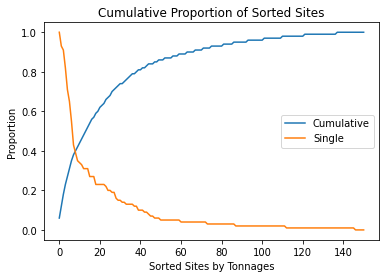

In [ ]:
plt.ylabel('Proportion')
plt.xlabel('Sorted Sites by Tonnages')
plt.title('Cumulative Proportion of Sorted Sites')
plt.plot([i[0] for i in res],label='Cumulative')
plt.plot([i[1] for i in res],label='Single')
plt.legend()
plt.show()

In [ ]:
d_loc_ton['BU #82 - Warren Towers']

{1: [19.375000000000004, 20],
 2: [29.84400000000001, 26],
 3: [33.780499999999975, 30],
 4: [34.159999999999975, 30],
 5: [28.792500000000015, 30],
 6: [9.089999999999998, 21],
 7: [7.48, 2],
 8: [0, 0],
 9: [38.8065, 23],
 10: [32.89150000000001, 20],
 11: [35.5715, 28],
 12: [24.816000000000003, 25]}

In [ ]:
[0]*12

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
list(d_loc_ton)

In [ ]:
id_set = list(set(dw['Customer Key']))
N = 5
fig = plt.figure(figsize=(30, 15))
for id in id_set:
  dws = dw[dw['Customer Key']==id]
  dws['month'] = [int(date.split('/')[0]) for date in dws['Work Order Date']]
  tons = {i:{'T':0,'R':0,'A':0} for i in range(1,13)} # trash,recyle,compost
  def cal(data):
    tp,ton,month = data
    tons[month][tp[0]] += ton
    tons[month]['A'] += ton
  dws[['Material','Tons','month']].apply(cal,axis=1)
  list([tons[i]['A'] for i in range(1,13)])

In [ ]:

for month in range(1, 13):
    plt.subplot(2, 6, month)
    score = scores[month]
    plt.bar(f_names,[i[0] for i in score])
    plt.xticks(np.arange(10), f_names, rotation='vertical')
    plt.ylim(-0.5, 0.5)
    plt.title(f'month: {month}')
    plt.grid(True)
plt.show()

In [ ]:
set(dws['Material'])

{'Recycling', 'Trash'}

In [ ]:
tons = {i:{'T':0,'R':0,'A':0} for i in range(1,13)} # trash,recyle,compost
def cal(data):
  tp,ton,month = data
  tons[month][tp[0]] += ton
  tons[month]['A'] += ton
dws[['Material','Tons','month']].apply(cal,axis=1)
tons

{1: {'T': 13.8, 'R': 4.340999999999999, 'A': 18.141},
 2: {'T': 15.02, 'R': 4.400499999999999, 'A': 19.420499999999986},
 3: {'T': 15.16, 'R': 5.4715, 'A': 20.631499999999985},
 4: {'T': 17.67, 'R': 5.647499999999999, 'A': 23.31749999999999},
 5: {'T': 12.610000000000001, 'R': 5.209, 'A': 17.818999999999996},
 6: {'T': 12.77, 'R': 2.245, 'A': 15.015},
 7: {'T': 25.190000000000005, 'R': 0, 'A': 25.190000000000005},
 8: {'T': 18.51, 'R': 0, 'A': 18.51},
 9: {'T': 15.719999999999999, 'R': 0.672, 'A': 16.392000000000003},
 10: {'T': 20.810000000000002,
  'R': 1.5539999999999998,
  'A': 22.364000000000008},
 11: {'T': 16.7, 'R': 0.7819999999999999, 'A': 17.482000000000003},
 12: {'T': 12.129999999999999, 'R': 4.789000000000001, 'A': 16.919}}

In [ ]:
list([tons[i]['A'] for i in range(1,13)])

[18.141,
 19.420499999999986,
 20.631499999999985,
 23.31749999999999,
 17.818999999999996,
 15.015,
 25.190000000000005,
 18.51,
 16.392000000000003,
 22.364000000000008,
 17.482000000000003,
 16.919]

In [ ]:
dws

In [ ]:
d_weather = dict()
for i in range(len(weather)):
  date = weather['DATE'][i]
  d_weather[date] = weather.iloc[i,6:]

In [ ]:
devs = pd.read_csv("devs.csv")
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,index,absC
0,39569,2021-08-25,1120,22.70,5.82,0.0,0.0,84,94,76,240,12.1,0,0.70
1,39569,2021-08-25,1024,22.70,5.82,0.0,0.0,84,94,76,240,12.1,1,0.70
2,39569,2021-08-25,944,22.70,5.82,0.0,0.0,84,94,76,240,12.1,2,0.70
3,39569,2021-08-25,872,22.70,5.82,0.0,0.0,84,94,76,240,12.1,3,0.70
4,39569,2021-08-25,808,25.74,5.82,0.0,0.0,84,94,76,240,12.1,4,3.74


In [ ]:
devs['month'] = [int(date.split('-')[1]) for date in devs['date']]
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,index,absC,month
0,39569,2021-08-25,1120,22.70,5.82,0.0,0.0,84,94,76,240,12.1,0,0.70,8
1,39569,2021-08-25,1024,22.70,5.82,0.0,0.0,84,94,76,240,12.1,1,0.70,8
2,39569,2021-08-25,944,22.70,5.82,0.0,0.0,84,94,76,240,12.1,2,0.70,8
3,39569,2021-08-25,872,22.70,5.82,0.0,0.0,84,94,76,240,12.1,3,0.70,8
4,39569,2021-08-25,808,25.74,5.82,0.0,0.0,84,94,76,240,12.1,4,3.74,8


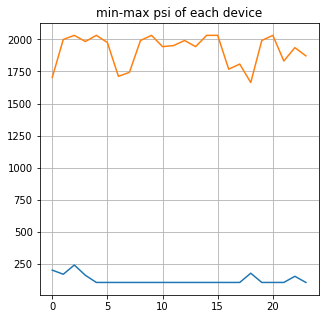

In [ ]:
N = 5
mins,maxs = [min(devs[devs['dev']==dev_id]['psi']) for dev_id in sorted(list(dev_set))] , [max(devs[devs['dev']==dev_id]['psi']) for dev_id in sorted(list(dev_set))]
fig= plt.figure(figsize=(5, 5))

plt.plot(mins)
plt.plot(maxs)
plt.grid(True)
plt.title("min-max psi of each device")
plt.show()

# For different devices

In [ ]:
dev_set = set(devs['dev'])
f_names = ['celsius','absC','TAVG', 'TMAX','TMIN', 'AWND', 'PRCP', 'SNOW',  'WDF2', 'WSF2']
scores = { dev_id:[] for dev_id in dev_set}
for dev_id in dev_set:
  dev_data = devs[devs['dev']==dev_id]
  dev_psi = dev_data['psi']
  for f_name in f_names:
    f_data = dev_data[f_name]
    res = stats.pearsonr(f_data,dev_psi)
    scores[dev_id].append(res)

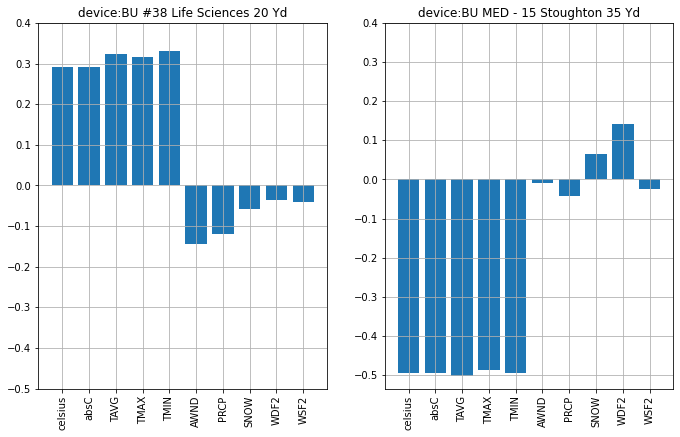

In [ ]:
N = 5
dic = {39692:'BU MED - 15 Stoughton 35 Yd',39600:'BU #38 Life Sciences 20 Yd'}
fig= plt.figure(figsize=(30, 39))
num = 1 
for dev_id in sorted(list(dev_set)):
  if dev_id not in [39692,39600]:
    continue
  row,col = num//N,num%N
  plt.subplot(N,N,num+1)
  score = scores[dev_id]
  plt.bar(f_names,[i[0] for i in score])
  plt.xticks(np.arange(10),f_names,rotation='vertical')
  plt.yticks(np.arange(-0.5, 0.5, step=0.1))
  plt.title(f'device:{dic[dev_id]}')
  plt.grid(True)
  num+=1
plt.show()

# For different months but on single device

39692:BU MED - 15 Stoughton 35 Yd  --32107

39600:BU #38 Life Sciences 20 Yd

In [ ]:
dev_id = 39692
f_names = ['celsius','TAVG', 'TMAX','TMIN', 'AWND', 'PRCP', 'SNOW',  'WDF2', 'WSF2']
scores = {f:[]for f in f_names}
dev_data = devs[devs['dev']==dev_id]
for feature in f_names:
  res = [dev_data[dev_data['month']==m][feature].mean() for m in range(1,13)]
  scores[feature].append(res)
psis = [dev_data[dev_data['month']==m]['psi'].mean() for m in range(1,13)]

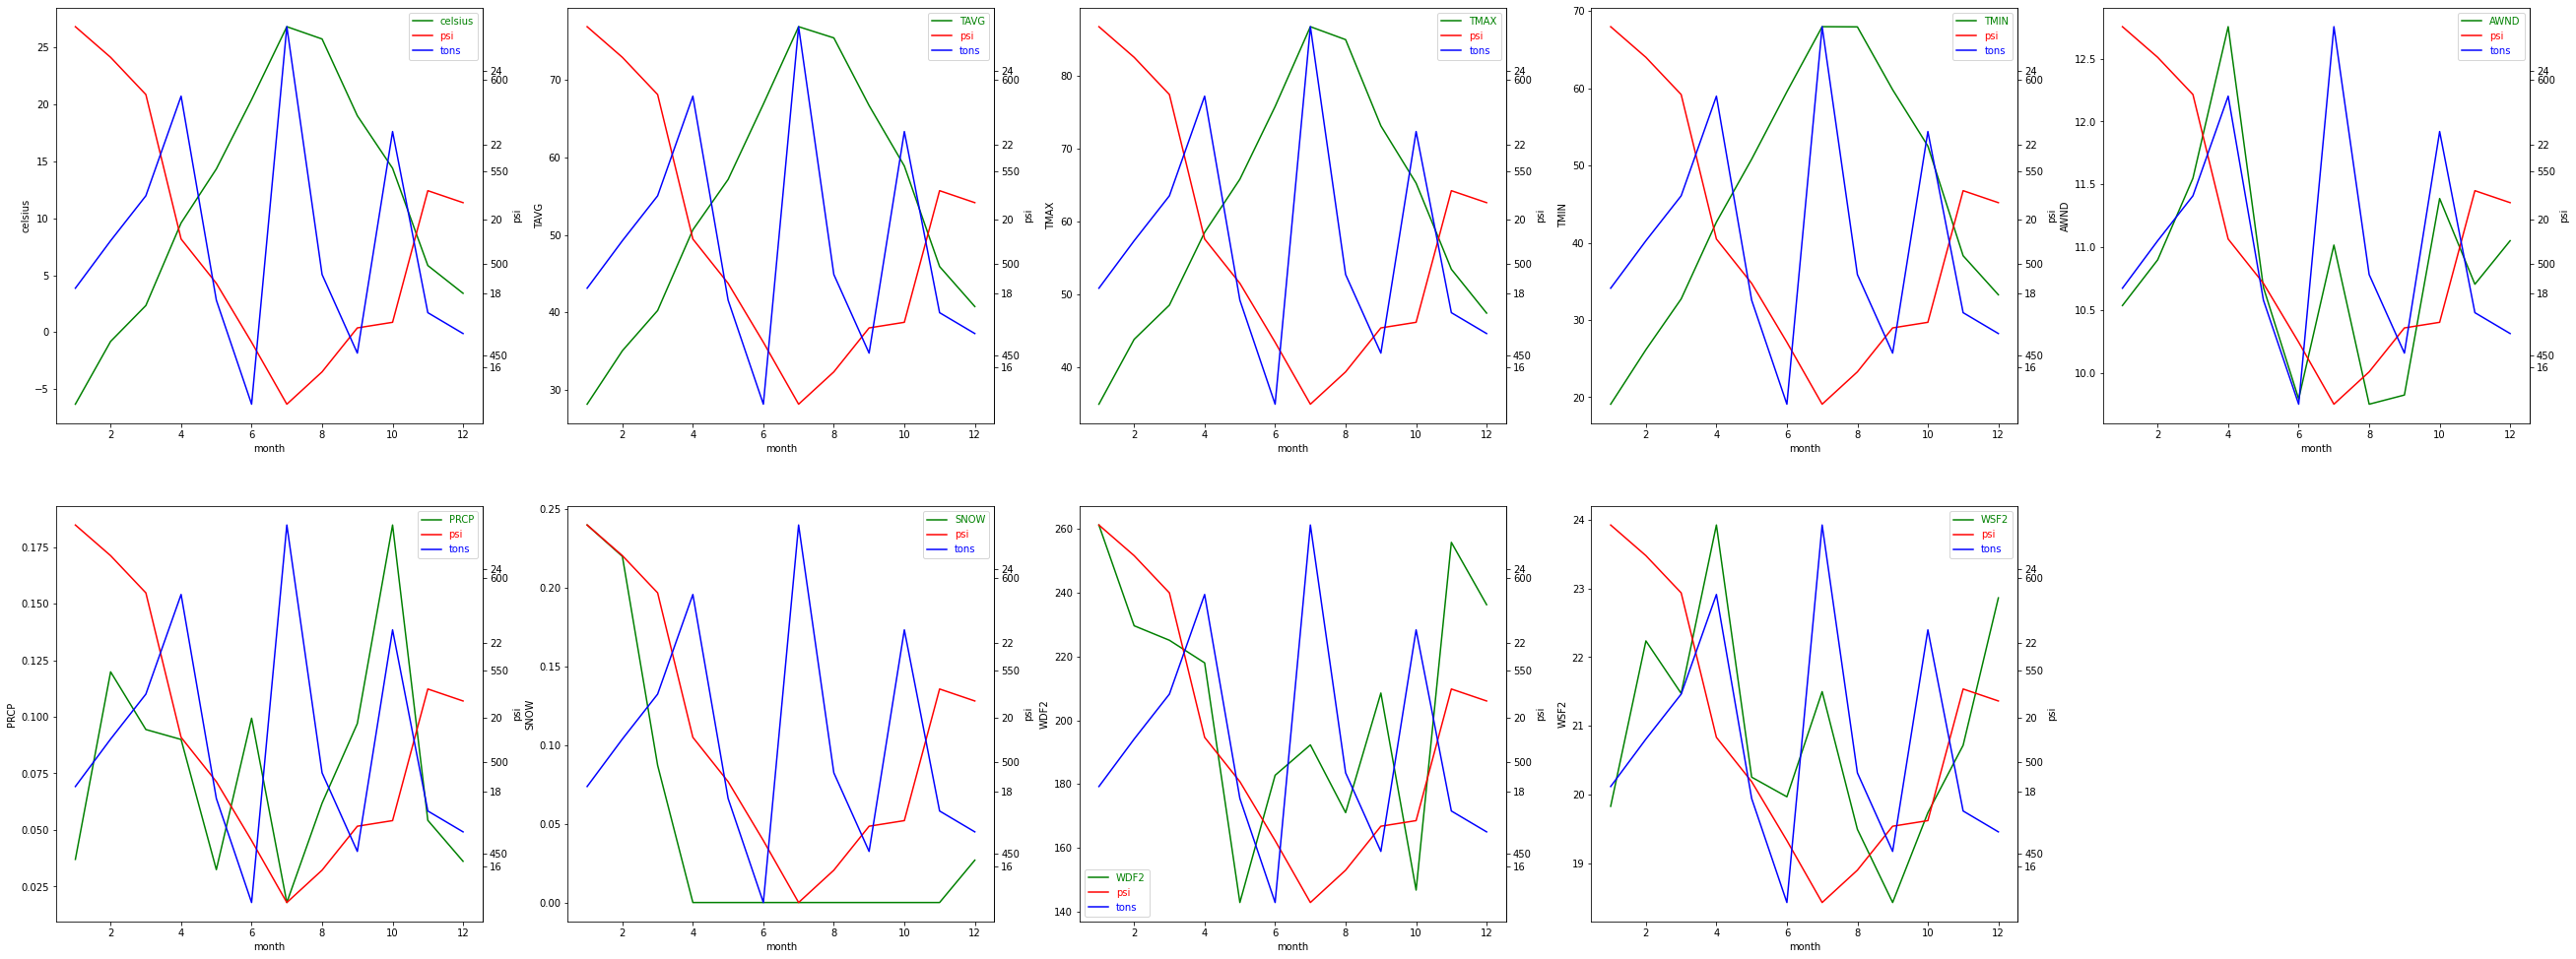

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
N = 5

fig= plt.figure(figsize=(45, 45))
for num,f in enumerate(f_names):

  host = host_subplot(int(f'55{num+1}'))
  par = host.twinx()
  b = host.twinx()

  host.set_xlabel("month")
  host.set_ylabel(f)
  par.set_ylabel("psi")

  host.plot(list(range(1,13)),scores[f][0], label=f,color = 'g')
  par.plot(list(range(1,13)), psis, label="psi",color = 'r')
  b.plot(list(range(1,13)), list([tons[i]['A'] for i in range(1,13)]), label="tons",color = 'b')

  host.legend(labelcolor="linecolor")
  plt.plot()
plt.show()

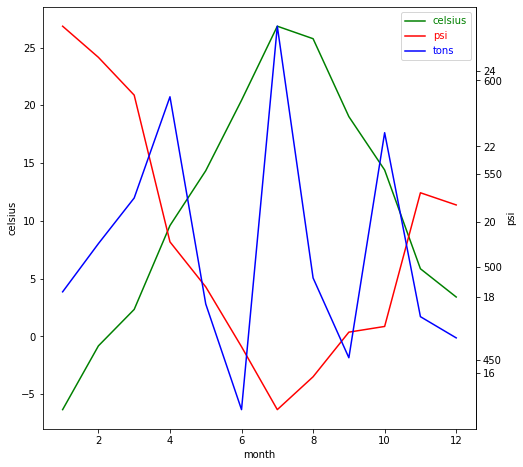

In [ ]:
from mpl_toolkits.axes_grid1 import host_subplot
N = 5

fig= plt.figure(figsize=(45, 45))
for num,f in enumerate(f_names):

  host = host_subplot(int(f'55{num+1}'))
  par = host.twinx()
  b = host.twinx()

  host.set_xlabel("month")
  host.set_ylabel(f)
  par.set_ylabel("psi")

  host.plot(list(range(1,13)),scores[f][0], label=f,color = 'g')
  par.plot(list(range(1,13)), psis, label="psi",color = 'r')
  b.plot(list(range(1,13)), list([tons[i]['A'] for i in range(1,13)]), label="tons",color = 'b')

  host.legend(labelcolor="linecolor")
  plt.plot()
  plt.show()
  break

In [ ]:
int(f'55{num}')

559

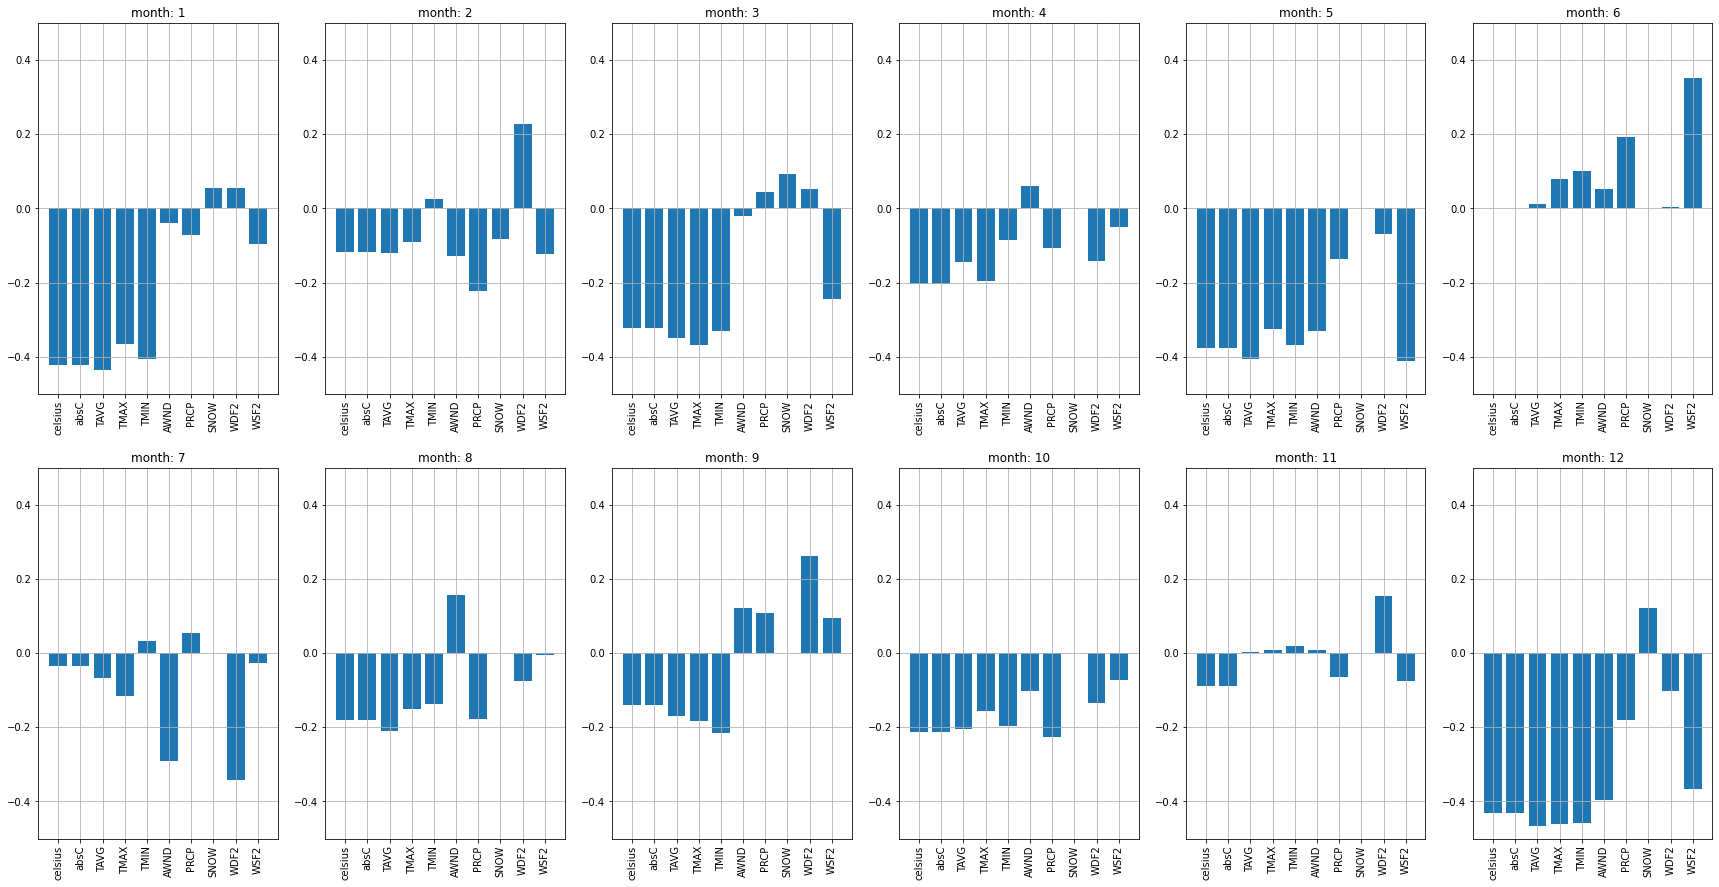

In [ ]:
N = 5
fig = plt.figure(figsize=(30, 15))
for month in range(1, 13):
    plt.subplot(2, 6, month)
    score = scores[month]
    plt.bar(f_names,[i[0] for i in score])
    plt.xticks(np.arange(10), f_names, rotation='vertical')
    plt.ylim(-0.5, 0.5)
    plt.title(f'month: {month}')
    plt.grid(True)
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# For all deivce data

In [ ]:
score_all = [] 
for f_name in f_names:
  f_data = devs[f_name]
  dev_psi = devs['psi']
  res = stats.pearsonr(f_data,dev_psi)
  score_all.append(res)

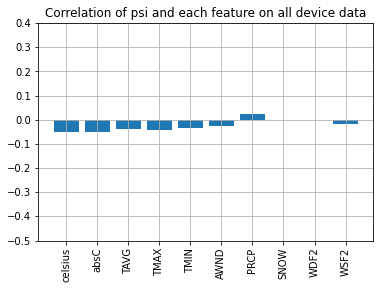

In [ ]:
N = 5
# fig= plt.figure(figsize=(5, 5))

plt.bar(f_names,[i[0] for i in score_all])
plt.xticks(np.arange(10),f_names,rotation='vertical')
plt.yticks(np.arange(-0.5, 0.5, 0.1))
plt.grid(True)
plt.title("Correlation of psi and each feature on all device data")
plt.show()

In [ ]:
devs.to_csv('devs.csv',index=False)

In [ ]:
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25,1120,22.70,5.82,0.0,0,84,94,76,240,12.1
1,39569,2021-08-25,1024,22.70,5.82,0.0,0,84,94,76,240,12.1
2,39569,2021-08-25,944,22.70,5.82,0.0,0,84,94,76,240,12.1
3,39569,2021-08-25,872,22.70,5.82,0.0,0,84,94,76,240,12.1
4,39569,2021-08-25,808,25.74,5.82,0.0,0,84,94,76,240,12.1


In [ ]:

res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
res

(-0.7426106572325059, 0.15055580885344538)

In [ ]:
devs.to_csv('devs.csv',index=False)

In [ ]:
devs.iloc[0,5:]

PRCP     0.0
SNOW       0
TAVG      84
TMAX      94
TMIN      76
WDF2     240
WSF2    12.1
Name: 0, dtype: object

In [ ]:
devs['date'] = devs['date'].apply(get_date)
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
import copy
import numpy as np
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split
 
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 64  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
model = get_model()
# training loop
for epoch in tqdm(range(n_epochs)):
    model.train()
    with tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


<All keys matched successfully>

In [ ]:
devs[[ 'AWND','PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WSF2']] = 0
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25T12:14:32,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25T12:15:08,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25T12:21:52,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25T12:22:53,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25T12:27:45,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
def get_dev_id(name):
  return name.split('.')[1].split('_')[0]
def get_date(time):
  return time.split('T')[0]
def date_to_num(date):
  _,m,d = date.split("-")
  m,d = int(m),int(d)
  res = ((m-1)*30+d)/360
  return int(365*res)

In [ ]:
devs.to_csv('devices.csv',index=False)

In [ ]:
weather.dropna(axis=1,how="any",inplace=True)
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-01,6.26,",,W",0.10,",,W,2400",...,34.0,"H,,S",36.0,",,W",29.0,",,W",320.0,",,W",17.0,",,W"
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-02,14.32,",,W",0.41,",,W,2400",...,39.0,"H,,S",42.0,",,W",32.0,",,W",310.0,",,W",28.0,",,W"
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-03,9.40,",,W",0.03,",,W,2400",...,33.0,"H,,S",36.0,",,W",29.0,",,W",20.0,",,W",17.0,",,W"
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-04,11.41,",,W",0.00,"T,,W,2400",...,34.0,"H,,S",39.0,",,W",31.0,",,W",30.0,",,W",17.0,",,W"
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-05,10.74,",,W",0.01,",,W,2400",...,32.0,"H,,S",33.0,",,W",30.0,",,W",340.0,",,W",15.0,",,W"


In [ ]:
weather = weather[[i for i in weather.columns if "ATTR" not in i]]
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-01,6.26,0.10,0.0,34.0,36.0,29.0,320.0,17.0
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-02,14.32,0.41,0.0,39.0,42.0,32.0,310.0,28.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-03,9.40,0.03,0.2,33.0,36.0,29.0,20.0,17.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-04,11.41,0.00,0.0,34.0,39.0,31.0,30.0,17.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-05,10.74,0.01,0.0,32.0,33.0,30.0,340.0,15.0


In [ ]:
weather.to_csv('weather.csv',index=False)

In [ ]:
dev = pd.read_csv('devices.csv',header=None)
dev.head()

,0,1,2,3
0,39569,2021-08-25T12:14:32,1120,22.70
1,39569,2021-08-25T12:15:08,1024,22.70
2,39569,2021-08-25T12:21:52,944,22.70
3,39569,2021-08-25T12:22:53,872,22.70
4,39569,2021-08-25T12:27:45,808,25.74


In [ ]:
dev[['AWND','PRCP','SNOW','TAVG','TMAX','TMIN','WDF2','WSF2']]=0
dev.head()

,0,1,2,3,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25T12:14:32,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25T12:15:08,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25T12:21:52,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25T12:22:53,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25T12:27:45,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
f_name = ['DATE','TAVG','TMAX','TMIN']
weather[f_name].head()

,DATE,TAVG,TMAX,TMIN
6763,2021-01-01,34.0,36.0,29.0
6764,2021-01-02,39.0,42.0,32.0
6765,2021-01-03,33.0,36.0,29.0
6766,2021-01-04,34.0,39.0,31.0
6767,2021-01-05,32.0,33.0,30.0


In [ ]:
weather[f_name].to_csv("date_temperature.csv",index=False)
test = pd.read_csv("date_temperature.csv")
test.head()

,DATE,TAVG,TMAX,TMIN
0,2021-01-01,34.0,36.0,29.0
1,2021-01-02,39.0,42.0,32.0
2,2021-01-03,33.0,36.0,29.0
3,2021-01-04,34.0,39.0,31.0
4,2021-01-05,32.0,33.0,30.0


In [ ]:
filename = 'readings_device.24363_from.2021-07-01_to.2021-10-02.csv'

dev_id = filename.split('.')[1].split('_')[0]
dev_id

'24363'

In [ ]:
dataset = pd.read_csv("./Data/readings_device.24363_from.2021-07-01_to.2021-10-02.csv")
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit
0,2021-08-24T10:11:19,1104,24.96,76.928
1,2021-08-24T10:12:52,1008,24.96,76.928
2,2021-08-24T10:14:19,1096,24.96,76.928
3,2021-08-24T10:20:15,968,24.96,76.928
4,2021-08-24T10:41:45,1168,24.96,76.928


In [ ]:
dataset['season'] = [date_to_num(get_date(time)) for time in dataset['readingDtUtz']]
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit,season
0,2021-08-24T10:11:19,1104,24.96,76.928,237
1,2021-08-24T10:12:52,1008,24.96,76.928,237
2,2021-08-24T10:14:19,1096,24.96,76.928,237
3,2021-08-24T10:20:15,968,24.96,76.928,237
4,2021-08-24T10:41:45,1168,24.96,76.928,237


In [ ]:
dataset['dev_id'] = dev_id
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit,dev_id
0,2021-08-24T10:11:19,1104,24.96,76.928,24363
1,2021-08-24T10:12:52,1008,24.96,76.928,24363
2,2021-08-24T10:14:19,1096,24.96,76.928,24363
3,2021-08-24T10:20:15,968,24.96,76.928,24363
4,2021-08-24T10:41:45,1168,24.96,76.928,24363


,readingDtUtz,valuePsi,celsius,fahrenheit,season
0,2021-08-24T10:11:19,1104,24.96,76.928,237
1,2021-08-24T10:12:52,1008,24.96,76.928,237
2,2021-08-24T10:14:19,1096,24.96,76.928,237
3,2021-08-24T10:20:15,968,24.96,76.928,237
4,2021-08-24T10:41:45,1168,24.96,76.928,237
...,...,...,...,...,...
201,2021-09-29T11:21:43,848,10.93,51.674,272
202,2021-09-30T10:37:42,872,12.02,53.636,273
203,2021-09-30T10:39:27,1120,12.02,53.636,273
204,2021-09-30T20:14:36,1112,13.97,57.146,273


In [ ]:
dataset[['dev_id','readingDtUtz','valuePsi','celsius']].to_csv('devices.csv',mode='a',index=False,header=False)

In [ ]:
test = pd.read_csv('devices.csv')
test.head()

,dev_id,date,psi,celsius24363,2021-08-24T10:11:19,1104,24.96
0,24363,2021-08-24T10:12:52,1008,24.96,NaN,NaN,NaN
1,24363,2021-08-24T10:14:19,1096,24.96,NaN,NaN,NaN
2,24363,2021-08-24T10:20:15,968,24.96,NaN,NaN,NaN
3,24363,2021-08-24T10:41:45,1168,24.96,NaN,NaN,NaN
4,24363,2021-08-24T10:42:22,896,24.96,NaN,NaN,NaN


In [ ]:

for filename in os.listdir('./Data'):
  if 'readings' in filename:
    dev_id = get_dev_id(filename)
    dataset = pd.read_csv(f'./Data/{filename}')
    dataset['dev_id'] = dev_id
    dataset[['dev_id','readingDtUtz','valuePsi','celsius']].to_csv('devices.csv',mode='a',index=False,header=False)

In [ ]:
D_day = dict()
def record_D(data):
  v,d = data[1],data[4]
  if d not in D_day:
    D_day[d] = [v]
  else:
    D_day[d].append(v)
dataset.apply(record_D,axis=1)
D_day

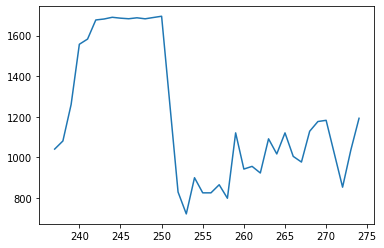

In [ ]:
days = [ i for i in D_day]
values = [np.mean(D_day[i]) for i in D_day]
plt.plot(days,values)
plt.show()

In [ ]:
print(max(dataset['valuePsi']))
print(min(dataset['valuePsi']))
print(max(dataset['celsius']))
print(min(dataset['celsius']))

1704
720
37.02
10.83


In [ ]:
get_date(dataset['readingDtUtz'][0])

'2021-08-24'

In [ ]:
dataset['celsius'].to_numpy().reshape(-1,1).shape

(206, 1)

In [ ]:

from sklearn.linear_model import LinearRegression
# >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# >>> # y = 1 * x_0 + 2 * x_1 + 3
# >>> y = np.dot(X, np.array([1, 2])) + 3
X = dataset['celsius'].to_numpy().reshape(-1,1)
Y = dataset['valuePsi'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X,Y)
reg.score(X, Y)

0.01411607582810881

In [ ]:
pre_x = np.array(range(-20,40))
pre_y = reg.predict(np.array(range(-20,40)).reshape(-1,1))

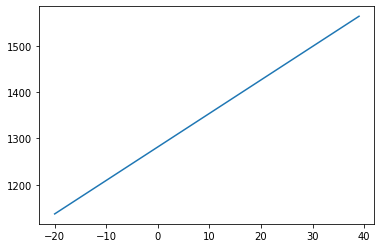

In [ ]:
plt.plot(pre_x,pre_y)
plt.show()